In [ ]:
# https://blog.keras.io/building-autoencoders-in-keras.html

# 1. Simple Autoencoder based on a fully connected network (covered in this session)
# 2. Sparse Autoencoder (pretty similar to the 1st autoencoder)
# 3. Deep Autoencoder based on a fully connected network
# 4. Deep Autoencoder based on a convolutional network
# 5. Application of the 4th autoencoder - Image Dnoising model (covered in this session)
# 6. A sequence-to-sequence autoencoder
# 7. A variational autoencoder

#1. Simple Autoencoder based on a fully connected network (covered in this session)


In [ ]:
import keras
from keras import layers #this is to code the architecture of the autoencoder

encoding_dim = 32 #latent representation dimension. Dimension of the middle hidden layer
input_img = keras.Input(shape=(784,)) # a one-dimensional vector

encoded = layers.Dense(encoding_dim, activation = 'relu')(input_img) #constructor to create a Dense layer. This will be an object that can take an input andd give an output
#In this case, the input will be an image. This is a shallow autoencoder, with three layers. 

#Another example: 
# fn = init_function() <--- constructor
# output = fn(input)
# output = init_function()(input)

decoded = layers.Dense(784, activation = 'sigmoid')(encoded) #Activation funcitons 'softmax' or 'sigmoid'
autoencoder = keras.Model(input_img, decoded) #This is why we don't need to explicitly create a Sequential wrap. Keras does it for you.


#Create A Separate Encoder


In [ ]:
#encoder = keras.Model(input_img, encoded) # Building encoder and decoder model separately then combining them in the end. They cannot be used separately
#encoded_Input = keras.Input(shape=(encoding_dim,)) # necessary to define this input for the decoder
#decoder_layer = layers.Dense(784, activation = 'sigmoid') #taking the last layer of the autoencoder
#decoder = keras.Model

In [ ]:
# Compile the model after you define it

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
from keras.datasets import mnist
import numpy as np

(X_train,_), (X_test,_) = mnist.load_data() #labels don't matter since autoencoders are designed just to reconstruct the image. The data is in the form of the array
X_train = X_train.astype('float32')/255.0 #normalize the data to place it into between 0 and 1. The integers need to be floating points with decimals
X_test = X_test.astype('float32')/255.0 #what you did for train you must do for test

# after you normalize the data, you must reshape the data
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:]))) # creating 2D images into 1 dimensional array. This is the flatten function in the sequential wrap
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))
print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


In [ ]:
autoencoder.fit(X_train, X_train, epochs=5, batch_size=256, shuffle=True, validation_data=(X_test,X_test)) #this is not classification, so there's no need for accuracy values
# try for batch sizes 32, 64, 128 
# try for epochs 10, 50, 100

Epoch 1/5
235/235 [==============================] - 1s 4ms/step - loss: 0.3824 - val_loss: 0.1881
Epoch 2/5
235/235 [==============================] - 1s 4ms/step - loss: 0.1787 - val_loss: 0.1533
Epoch 3/5
235/235 [==============================] - 1s 4ms/step - loss: 0.1494 - val_loss: 0.1339
Epoch 4/5
235/235 [==============================] - 1s 4ms/step - loss: 0.1318 - val_loss: 0.1214
Epoch 5/5
235/235 [==============================] - 1s 4ms/step - loss: 0.1204 - val_loss: 0.1128


#5. Application of the 4th autoencoder - Image Denoising model (covered in this session)


In [ ]:
# mentors need to tell us how to visualize the actual and reconstructed images
# Next step is to denoise the images

from keras.datasets import mnist
import numpy as np

(X_train,_), (X_test,_) = mnist.load_data() #labels don't matter since autoencoders are designed just to reconstruct the image. The data is in the form of the array
X_train = X_train.astype('float32')/255.0 #normalize the data to place it into between 0 and 1. The integers need to be floating points with decimals
X_test = X_test.astype('float32')/255.0 #what you did for train you must do for test

# after you normalize the data, you must reshape the data. This time we need to a fourth dimension, instead of flattening for 1 dimension
X_train = X_train.reshape((len(X_train), X_train.shape[1], X_train.shape[2], 1)) # creating 2D images into 1 dimensional array. This is the flatten function in the sequential wrap
X_test = X_test.reshape((len(X_test), X_test.shape[1], X_test.shape[2], 1))
print(X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [ ]:
# Now we need to create noise. This allows us to train the model to reduce noise for images in the test

noise_factor = 0.5
X_train_noisy = X_train + noise_factor*np.random.normal(loc=0.0, scale=1.0, size = X_train.shape)
X_test_noisy = X_test + noise_factor*np.random.normal(loc=0.0, scale=1.0, size = X_test.shape) 
#Gaussian/Normal distribution. Generate as many as noisy values as there are original values
X_train_noisy = np.clip(X_train_noisy, 0.0, 1.0)
X_test_noisy = np.clip(X_test_noisy, 0.0, 1.0)

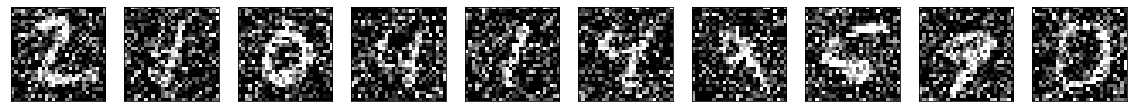

In [ ]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(X_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
input_img = keras.Input(shape=(28,28,1))

# Define the encoder. Convolution layer
x = layers.Conv2D(32, (3,3), activation = 'relu', padding='same')(input_img) #input the image into the convolution layer. Next up is the pooling layer
x = layers.MaxPooling2D((2,2), padding='same')(x) #padding states that your input dimension should be the same as the output.
x = layers.Conv2D(32, (3,3), activation = 'relu', padding='same')(x)
encoded = layers.MaxPooling2D((2,2), padding='same')(x)

# Define the decoder
x = layers.Conv2D(32, (3,3), activation = 'relu', padding='same')(encoded)
x = layers.UpSampling2D((2,2))(x) # This is the counterpart of max pooling where we unpool, multiply the convolution layer by the kernal and increase the...
x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2,2))(x)
decoded = layers.Conv2D(1, (3,3), activation='sigmoid', padding='same')(x) #The last layer only requires 1 kernel, not 32.

#autoencoder
autoencoder = keras.Model(input_img, decoded) #autoencoder defined
autoencoder.compile(optimizer='adam', loss='binary_crossentropy') #autoencoder compiled. Measure how far away the true value is from the prediction value (between 0 and 1)


In [ ]:
autoencoder.fit(X_train_noisy, X_train, epochs=100, batch_size=256, shuffle=True, validation_data=(X_test_noisy,X_test))

Epoch 1/100
235/235 [==============================] - 4s 13ms/step - loss: 0.3052 - val_loss: 0.1269
Epoch 2/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1244 - val_loss: 0.1163
Epoch 3/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1150 - val_loss: 0.1102
Epoch 4/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1107 - val_loss: 0.1072
Epoch 5/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1080 - val_loss: 0.1057
Epoch 6/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1059 - val_loss: 0.1037
Epoch 7/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1046 - val_loss: 0.1026
Epoch 8/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1034 - val_loss: 0.1019
Epoch 9/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1026 - val_loss: 0.1012
Epoch 10/100
235/235 [==============================] - 3s 11ms/step - loss: 0.101

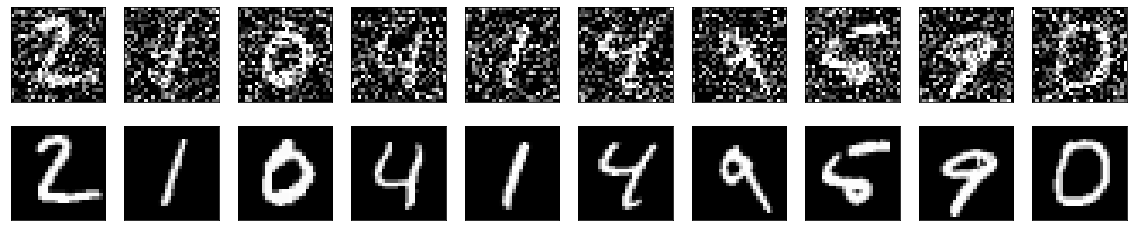

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(X_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(X_test[i].reshape(28, 28))
    #plt.imshow(decoded[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()